Холин Никита Андреевич

Все задачи выполнялись в одном виртуальном окружении study-env

1. python -m venv study-env (создание виртуального окружения)
2. source study-env/bin/activate (активация)
3. pip install matplotlib (установка matplotlib)
4. pip freeze > requirements.txt (сохранение зависимостей в файл)

    получился файл в котором указаны зависимости а также требуемый модуль

        matplotlib==3.9.2

Задание 1: Линейный график изменения температуры за неделю.

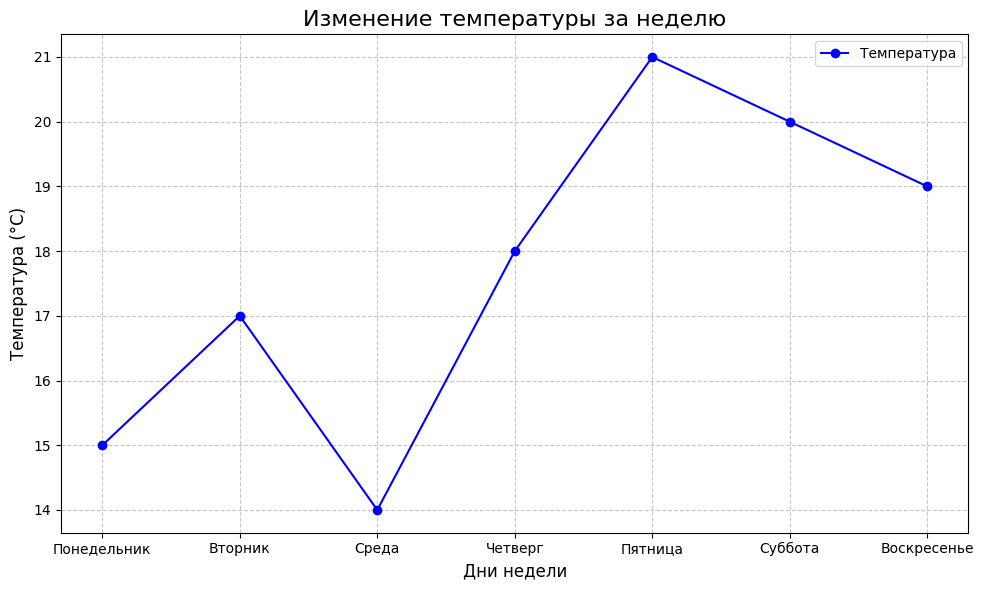

In [7]:
import matplotlib.pyplot as plt

# Данные температуры и дни недели
days = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
temperatures = [15, 17, 14, 18, 21, 20, 19]

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(days, temperatures, marker='o', linestyle='-', color='blue', label='Температура')

# Добавление заголовка и подписей осей
plt.title("Изменение температуры за неделю", fontsize=16)
plt.xlabel("Дни недели", fontsize=12)
plt.ylabel("Температура (°C)", fontsize=12)

# Добавление сетки и легенды c прозрачностью и пунктиром
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()


Задание 2: Столбчатый график количества студентов на разных факультетах

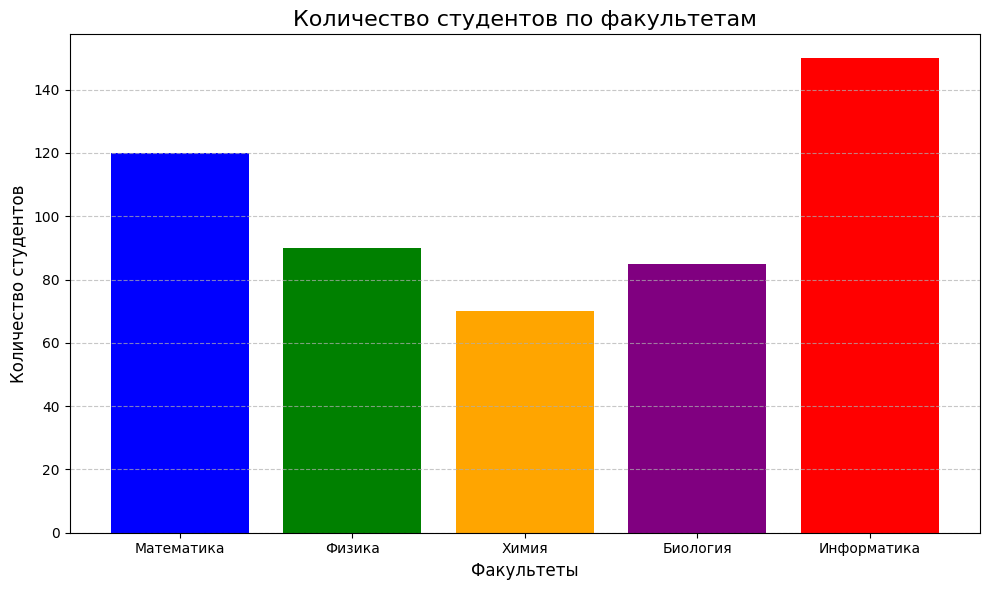

In [8]:
import matplotlib.pyplot as plt

# Данные
faculties = ["Математика", "Физика", "Химия", "Биология", "Информатика"]
students = [120, 90, 70, 85, 150]
colors = ["blue", "green", "orange", "purple", "red"]

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
plt.bar(faculties, students, color=colors)

# Добавление подписей и заголовка
plt.title("Количество студентов по факультетам", fontsize=16)
plt.xlabel("Факультеты", fontsize=12)
plt.ylabel("Количество студентов", fontsize=12)

# Добавление сетки
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображение графика
plt.tight_layout()
plt.show()


Задание 3: Круговая диаграмма распределения оценок студентов

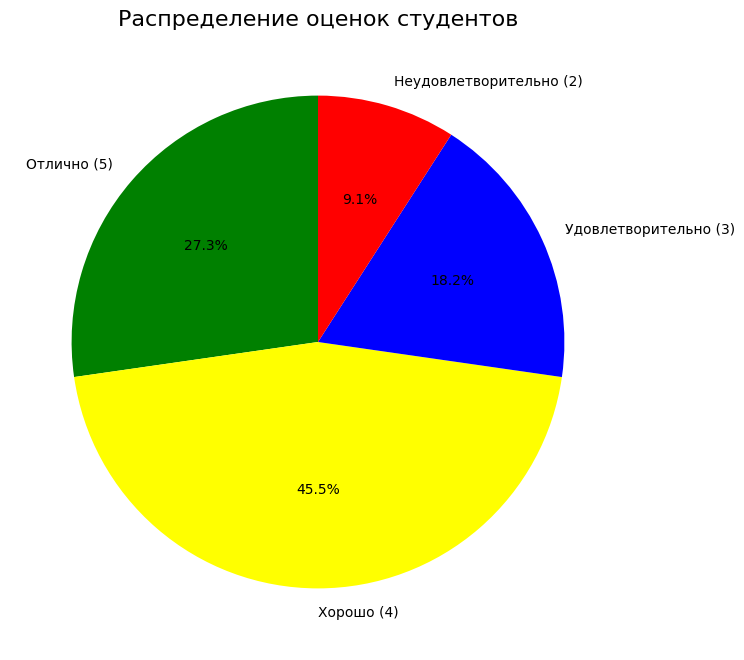

In [14]:
import matplotlib.pyplot as plt

# Данные
grades = ['Отлично (5)', 'Хорошо (4)', 'Удовлетворительно (3)', 'Неудовлетворительно (2)']
counts = [15, 25, 10, 5]

try:
    # Построение круговой диаграммы
    plt.figure(figsize=(8, 8))
    plt.pie(
        counts,
        labels=grades,
        autopct='%1.1f%%',
        startangle=90,
        colors=['green', 'yellow', 'blue', 'red']
    )
    
    # Добавление заголовка
    plt.title('Распределение оценок студентов', fontsize=16)

    # Отображение графика
    plt.show()

except Exception as e:
    print(f"Произошла ошибка при построении графика: {e}")


Задание 4: Диаграмма рассеяния зависимости между двумя переменными

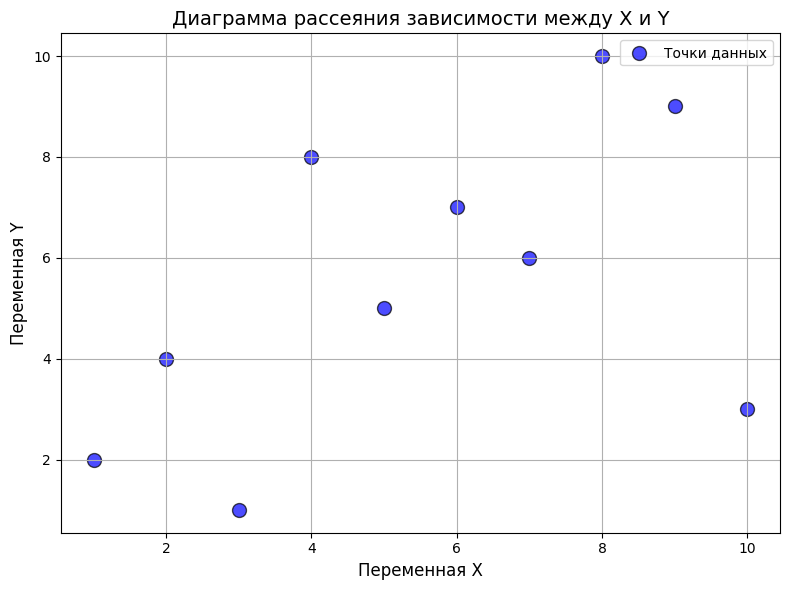

In [15]:
import matplotlib.pyplot as plt

# Данные
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 1, 8, 5, 7, 6, 10, 9, 3]

try:
    # Проверка длины данных
    if len(x) != len(y):
        raise ValueError("Списки x и y должны быть одинаковой длины.")

    # Построение диаграммы рассеяния
    plt.figure(figsize=(8, 6))
    plt.scatter(
        x,
        y,
        color='blue',
        marker='o', # маркеры имеют круглый вид
        s=100, # размер маркеров увеличен для лучшей видимости
        alpha=0.7, # добавлена прозрачность
        edgecolor='black', # добавлены чёрные края для точек, чтобы их было лучше видно
        label='Точки данных' # маркеры имеют круглый вид
    )

    # Добавление подписей осей
    plt.xlabel("Переменная X", fontsize=12)
    plt.ylabel("Переменная Y", fontsize=12)

    # Добавление заголовка
    plt.title("Диаграмма рассеяния зависимости между X и Y", fontsize=14)

    # Добавление легенды
    plt.legend()

    # Отображение графика
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Произошла ошибка: {e}")


Задание 7: Круговая диаграмма с подписью долей и легендой

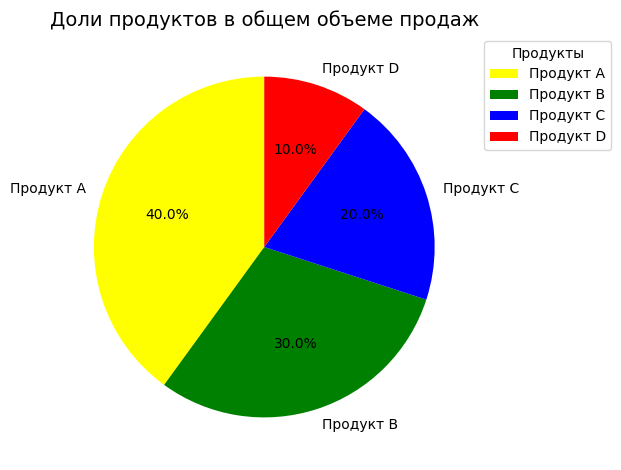

In [29]:
import matplotlib.pyplot as plt

# Данные
products = ['Продукт A', 'Продукт B', 'Продукт C', 'Продукт D']
sales = [40, 30, 20, 10]

# Построение круговой диаграммы
plt.pie(sales, labels=products, autopct='%1.1f%%', startangle=90, colors=['yellow', 'green', 'blue', 'red'])

# Добавление легенды
plt.legend(products, title="Продукты", loc="upper left", bbox_to_anchor=(1, 1))

# Заголовок
plt.title('Доли продуктов в общем объеме продаж', fontsize=14)

# Отображение графика
plt.tight_layout()
plt.show()


Задание 10: График с несколькими подграфиками (subplots)

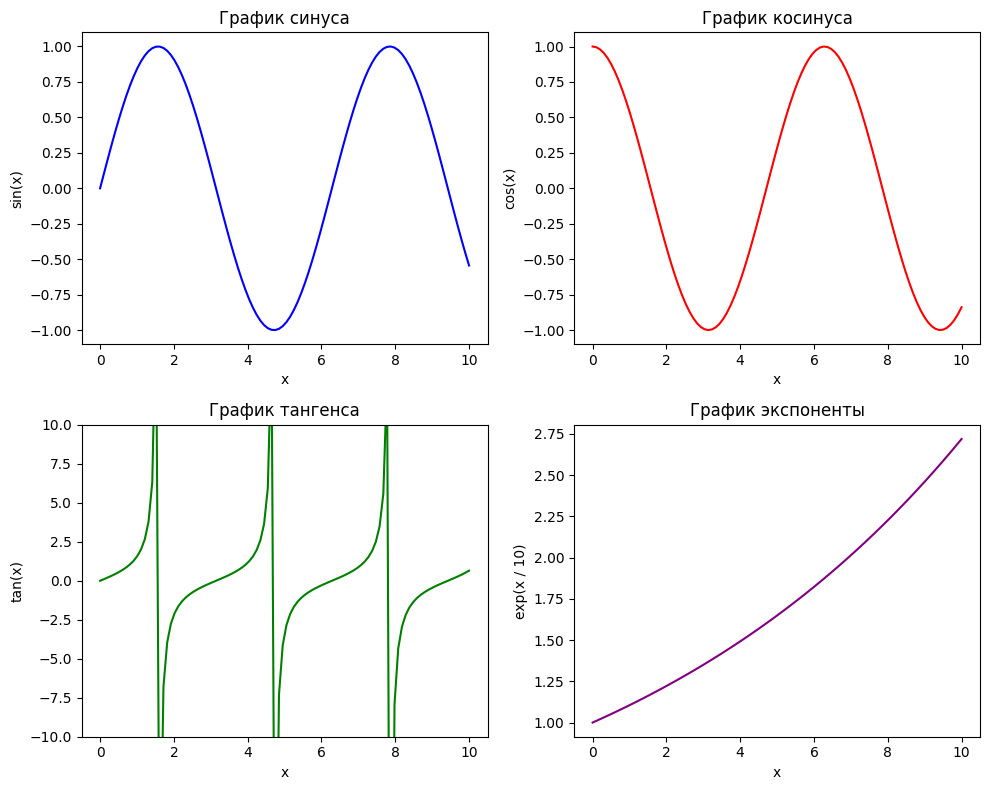

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
x = np.linspace(0, 10, 100)  # 100 точек от 0 до 10
y1 = np.sin(x)  # Синус
y2 = np.cos(x)  # Косинус
y3 = np.tan(x)  # Тангенс
y4 = np.exp(x / 10)  # Экспоненциальная функция

# Создание фигуры и осей (сетка 2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 строки и 2 столбца

# Первый график (синус)
axs[0, 0].plot(x, y1, color='blue')
axs[0, 0].set_title('График синуса')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('sin(x)')

# Второй график (косинус)
axs[0, 1].plot(x, y2, color='red')
axs[0, 1].set_title('График косинуса')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('cos(x)')

# Третий график (тангенс)
axs[1, 0].plot(x, y3, color='green')
axs[1, 0].set_title('График тангенса')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('tan(x)')
axs[1, 0].set_ylim(-10, 10)  # Ограничение оси Y для тангенса

# Четвертый график (экспоненциальная функция)
axs[1, 1].plot(x, y4, color='purple')
axs[1, 1].set_title('График экспоненты')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('exp(x / 10)')

# Настройка и отображение
plt.tight_layout()  # Подгонка элементов для правильного отображения
plt.show()  # Отображение графиков


Задание 11: График с областями заливки между двумя линиями

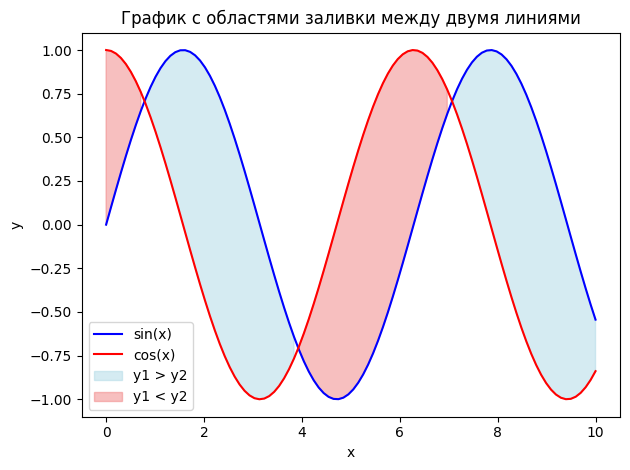

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
x = np.linspace(0, 10, 100)  # 100 точек от 0 до 10
y1 = np.sin(x)  # Первая линия (синус)
y2 = np.cos(x)  # Вторая линия (косинус)

# Построение графика
plt.plot(x, y1, label='sin(x)', color='blue')  # Линия синуса
plt.plot(x, y2, label='cos(x)', color='red')   # Линия косинуса

# Заливка области между y1 и y2
plt.fill_between(x, y1, y2, where=(y1 > y2), color='lightblue', alpha=0.5, label='y1 > y2')
plt.fill_between(x, y1, y2, where=(y1 < y2), color='lightcoral', alpha=0.5, label='y1 < y2')

# Добавление подписей и заголовка
plt.title('График с областями заливки между двумя линиями')
plt.xlabel('x')
plt.ylabel('y')

# Легенда
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()


После выполнениения заданий - команда deactivate для деактивации окружения.